In [108]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests


In [109]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [110]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [111]:
from citipy import citipy
from config import weather_api_key

In [112]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a18d4be393c468ae3c8bf43e9b87aef


In [113]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [114]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

590

In [115]:
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

ushuaia ar
kamenskiy ru
belushya guba ru
rikitea pf
barentsburg sj
pevek ru
omsukchan ru
jamestown sh
punta arenas cl
new norfolk au
kuroishi jp
touros br
punta arenas cl
taolanaro mg
palmer us
nanortalik gl
hermanus za
cuamba mz
tartagal ar
ca mau vn
tuktoyaktuk ca
port lincoln au
alice springs au
sidney us
taolanaro mg
ushuaia ar
mehamn no
new norfolk au
new norfolk au
dikson ru
rungata ki
ahipara nz
tilichiki ru
laguna br
tasiilaq gl
tarland gb
rikitea pf
busselton au
busselton au
marsh harbour bs
tawau my
tuktoyaktuk ca
palabuhanratu id
country club us
jamestown sh
katsuura jp
attawapiskat ca
east london za
punta arenas cl
dikson ru
bilibino ru
aklavik ca
atuona pf
rikitea pf
sungaipenuh id
tuatapere nz
amderma ru
barentsburg sj
lambarene ga
hilo us
ushuaia ar
vaini to
laguna br
ushuaia ar
bengkulu id
ushuaia ar
hilo us
lagoa pt
bredasdorp za
punta arenas cl
georgetown sh
bethel us
hilo us
norman wells ca
kalmunai lk
mahebourg mu
bluff nz
ushuaia ar
umzimvubu za
kodiak us
saint-phi

airai pw
humaita br
severo-kurilsk ru
cherskiy ru
jamestown sh
victoria sc
dodge city us
rikitea pf
longyearbyen sj
pengcheng cn
basoko cd
saldanha za
tuatapere nz
thompson ca
lahaina us
harer et
port hueneme us
payson us
dwarka in
bambous virieux mu
vaini to
portland au
samarai pg
san quintin mx
puerto ayora ec
arraial do cabo br
zhigansk ru
south river ca
ginda er
hambantota lk
calama cl
jamestown sh
yellowknife ca
punta arenas cl
solnechnyy ru
plast ru
kaitangata nz
lata sb
taolanaro mg
cap malheureux mu
ushuaia ar
rikitea pf
emerald au
barentsburg sj
colares pt
bolungarvik is
clyde river ca
le vauclin mq
arraial do cabo br
aswan eg
albany au
punta arenas cl
maragogi br
lincoln ar
carnarvon au
abbeville us
cooma au
grindavik is
ushuaia ar
praia cv
kodiak us
yellowknife ca
ushuaia ar
itoman jp
asau tv
marsa matruh eg
castro cl
hereford us
izumo jp
albany au
kazalinsk kz
gainesville us
hasaki jp
provideniya ru
port alfred za
east london za
pilar ph
baykit ru
busselton au
taolanaro mg


In [116]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [117]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
     # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
     # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
  

Processing Record 1 of Set 12 | ushuaia
Processing Record 2 of Set 12 | kamenskiy
Processing Record 3 of Set 12 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 12 | rikitea
Processing Record 5 of Set 12 | barentsburg
City not found. Skipping...
Processing Record 6 of Set 12 | pevek
Processing Record 7 of Set 12 | omsukchan
Processing Record 8 of Set 12 | jamestown
Processing Record 9 of Set 12 | punta arenas
Processing Record 10 of Set 12 | new norfolk
Processing Record 11 of Set 12 | kuroishi
Processing Record 12 of Set 12 | touros
Processing Record 13 of Set 12 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 12 | palmer
Processing Record 15 of Set 12 | nanortalik
Processing Record 16 of Set 12 | hermanus
Processing Record 17 of Set 12 | cuamba
Processing Record 18 of Set 12 | tartagal
Processing Record 19 of Set 12 | ca mau
Processing Record 20 of Set 12 | tuktoyaktuk
Processing Record 21 of Set 12 | port lincoln
Processing Record 22 of Set 

Processing Record 33 of Set 15 | padang
Processing Record 34 of Set 15 | vaitupu
City not found. Skipping...
Processing Record 35 of Set 15 | hithadhoo
Processing Record 36 of Set 15 | emerald
Processing Record 37 of Set 15 | wisconsin rapids
Processing Record 38 of Set 15 | dingle
Processing Record 39 of Set 15 | ketchikan
Processing Record 40 of Set 15 | brandon
Processing Record 41 of Set 15 | olafsvik
Processing Record 42 of Set 15 | tiksi
Processing Record 43 of Set 15 | chokurdakh
Processing Record 44 of Set 15 | strezhevoy
Processing Record 45 of Set 15 | maryville
Processing Record 46 of Set 15 | jabiru
City not found. Skipping...
Processing Record 47 of Set 15 | anadyr
Processing Record 48 of Set 15 | thinadhoo
Processing Record 49 of Set 15 | antalaha
Processing Record 50 of Set 15 | mogzon
Processing Record 1 of Set 16 | mercedes
Processing Record 2 of Set 16 | jilmah
City not found. Skipping...
Processing Record 3 of Set 16 | santa pola
Processing Record 4 of Set 16 | bridl

Processing Record 18 of Set 19 | maningrida
Processing Record 19 of Set 19 | macau
Processing Record 20 of Set 19 | beringovskiy
Processing Record 21 of Set 19 | condega
Processing Record 22 of Set 19 | hamilton
Processing Record 23 of Set 19 | kuche
City not found. Skipping...
Processing Record 24 of Set 19 | marcona
City not found. Skipping...
Processing Record 25 of Set 19 | ambilobe
Processing Record 26 of Set 19 | waipawa
Processing Record 27 of Set 19 | birao
Processing Record 28 of Set 19 | skjervoy
Processing Record 29 of Set 19 | altay
Processing Record 30 of Set 19 | kjollefjord
Processing Record 31 of Set 19 | barcelona
Processing Record 32 of Set 19 | bodden town
Processing Record 33 of Set 19 | alta floresta
Processing Record 34 of Set 19 | hare bay
Processing Record 35 of Set 19 | pyapon
Processing Record 36 of Set 19 | dudinka
Processing Record 37 of Set 19 | nago
Processing Record 38 of Set 19 | mongoumba
Processing Record 39 of Set 19 | severo-yeniseyskiy
Processing Re

Processing Record 4 of Set 23 | karaton
Processing Record 5 of Set 23 | kyzyl-mazhalyk
Processing Record 6 of Set 23 | kalangala
Processing Record 7 of Set 23 | raton
Processing Record 8 of Set 23 | virginia beach
Processing Record 9 of Set 23 | port-gentil
Processing Record 10 of Set 23 | grand gaube
Processing Record 11 of Set 23 | malinovskiy
Processing Record 12 of Set 23 | boueni
Processing Record 13 of Set 23 | bandarbeyla
Processing Record 14 of Set 23 | saint-francois
Processing Record 15 of Set 23 | oranjemund
Processing Record 16 of Set 23 | shebalino
Processing Record 17 of Set 23 | chikwawa
Processing Record 18 of Set 23 | bergama
Processing Record 19 of Set 23 | sinnar
Processing Record 20 of Set 23 | sistranda
Processing Record 21 of Set 23 | mwanza
Processing Record 22 of Set 23 | naples
Processing Record 23 of Set 23 | nouakchott
Processing Record 24 of Set 23 | sakakah
Processing Record 25 of Set 23 | warqla
City not found. Skipping...
Processing Record 26 of Set 23 | 

In [122]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,46.02,81,20,10.36,AR,2021-07-28 15:58:35
1,Kamenskiy,50.8855,45.4880,76.98,43,64,3.31,RU,2021-07-28 15:58:35
2,Rikitea,-23.1203,-134.9692,74.44,78,100,13.94,PF,2021-07-28 15:58:36
3,Pevek,69.7008,170.3133,33.51,96,100,22.39,RU,2021-07-28 15:58:36
4,Omsukchan,62.5333,155.8000,41.16,91,100,3.80,RU,2021-07-28 15:58:36
5,Jamestown,42.0970,-79.2353,79.18,60,13,5.01,US,2021-07-28 15:58:37
6,Punta Arenas,-53.1500,-70.9167,46.42,81,0,6.91,CL,2021-07-28 15:55:36
7,New Norfolk,-42.7826,147.0587,43.92,76,65,5.99,AU,2021-07-28 15:58:37
8,Kuroishi,40.6389,140.5922,71.58,96,42,2.84,JP,2021-07-28 15:58:37
9,Touros,-5.1989,-35.4608,85.10,60,16,17.20,BR,2021-07-28 15:58:38


In [128]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

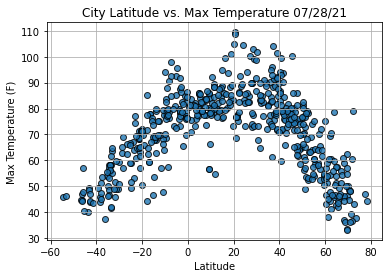

In [129]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

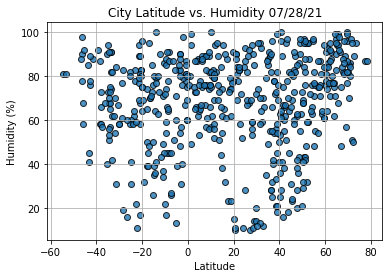

In [130]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

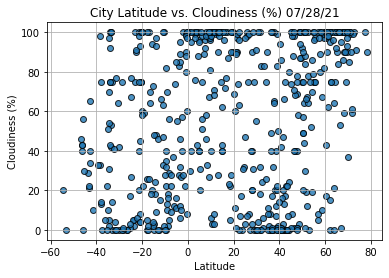

In [131]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

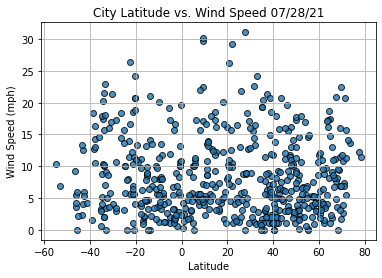

In [132]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()